In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.ion()

import sys
sys.path.append('/Users/jkinney/github/')
import logomaker

In [2]:
# Load all splice sites
df = pd.read_csv('hg38_sss.txt', sep='\t', index_col=0)
df.head()

,chrom,start,stop,strand,transcript,exon_num,exons_in_trx,ss3_start,ss3_stop,ss3_seq,ss5_start,ss5_stop,ss5_seq
0,chr1,34553,35174,-,uc001aak.4,0,3,-1,-1,------------------------------,34556,34547,GCTTCATGT
1,chr1,35276,35481,-,uc001aak.4,1,3,35511,35481,TGTTTTTATTTATTTATTTATTTTTTATAG,35279,35270,CTTGTAAGT
2,chr1,35720,36081,-,uc001aak.4,2,3,36111,36081,GATTAGTCCTGCTGCCCTGTGCCCAGCTCC,-1,-1,---------
3,chr1,497239,497299,-,uc001aaq.3,0,4,-1,-1,------------------------------,497242,497233,CCTCAACCT
4,chr1,498046,498305,-,uc001aaq.3,1,4,498335,498305,ATGCAAATGTGCTTACATCTTTTGGCCCAG,498049,498040,TAGGTATAC


In [3]:
# Get 5' splice sites
seqs = df['ss5_seq'].copy()
indices = [s[3]=='G' and s[4] in 'TC' for s in seqs]
seqs = seqs[indices]

# Get prob matrix
prob5_df = logomaker.alignment_to_matrix(seqs, to_type='probability', pseudocount=0)

Done! Output written to Example_SS5.pdf.


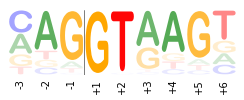

In [4]:
fig, ax = plt.subplots(figsize=[3.5,1.5])

# Create counts matrix
logo = logomaker.Logo(prob5_df, 
                      ax=ax,
                      vpad=.05,
                      width=.9,
                      font_name='Arial Rounded MT Bold')

# Style axes
logo.style_spines(visible=False)
#logo.style_spines(spines=['top','bottom'], linewidth=2)
logo.fade_glyphs_in_probability_logo()
logo.draw()

xticklabels = ['%+d'%x for x in [-3,-2,-1,1,2,3,4,5,6]]
ax.set_xticks(prob5_df.index)
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_yticks([])
ax.axvline(x=2.5, color='k', linewidth=.5)
ax.xaxis.set_tick_params(length=0)

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = 'Example_SS5.pdf'
fig.savefig(out_file)
print('Done! Output written to %s.'%out_file)

In [5]:
prob5_df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [6]:
# Get 3' splice sites
seqs = df['ss3_seq'].copy()
indices = [s[-2:] in 'AG' for s in seqs]
seqs = seqs[indices]

# Get prob matrix
prob3_df = logomaker.alignment_to_matrix(seqs, to_type='probability', pseudocount=0)
prob3_df.head()

,A,C,G,T
0,0.245443,0.240623,0.188187,0.325746
1,0.249706,0.239711,0.181164,0.329420
2,0.249406,0.240562,0.176483,0.333549
3,0.250618,0.243258,0.171806,0.334318
4,0.246774,0.244170,0.165835,0.343220


Done! Output written to Example_SS3.pdf.


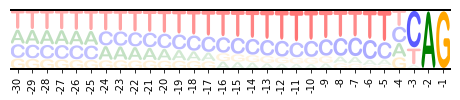

In [7]:
fig, ax = plt.subplots(figsize=[6.5,1.5])

# Create counts matrix
logo = logomaker.Logo(prob3_df, 
                      ax=ax,
                      vpad=.05,
                      font_name='Arial Rounded MT Bold')

# Style axes
logo.style_spines(visible=False)
logo.style_spines(spines=['top','bottom'], linewidth=2)
logo.fade_glyphs_in_probability_logo()

xticklabels = ['%+d'%(x-len(prob3_df)) for x in prob3_df.index]
ax.set_xticks(prob3_df.index)
ax.set_xticklabels(xticklabels, rotation=90)

#ax.set_xticks([])
ax.set_yticks([])

# Tight layout
plt.tight_layout()

# Save as pdf
out_file = 'Example_SS3.pdf'
fig.savefig(out_file)
print('Done! Output written to %s.'%out_file)